In [1]:
import numpy as np
import random
import pandas as pd
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
import argparse
import sys
import math
import cmath
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython.display import HTML

# Exercise 6.16: Lagrange Point

In [ ]:
def lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L = ((G * M) / np.square(r * u.m)) - ((G * m) / np.square(R - (r * u.m))) - (np.square(omega) * (r * u.m))
    
    return L.value

In [ ]:
def deriv_lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L_prime = ((-2 * G * M)/((r * u.m) ** 3)) - ((2 * G * m) / ((R - (r * u.m)) ** 3)) - np.square(omega)
    
    return L_prime.value

In [ ]:
r_range = np.linspace(1e8, 2e9, 1000)
L_vals = []
L_prime_vals = []

for r in r_range:
    L_vals.append(lagrange(r))
    L_prime_vals.append(deriv_lagrange(r))

In [ ]:
#L1 guess = 3.3e8 m
L1_guess = 3.3e8

def newtons_method(x_1, f = lagrange, f_prime = deriv_lagrange, tol = 1e-10, max_iter = 100000):
    num_iter = 0
    
    x_2 = x_1 - (f(x_1) / f_prime(x_1)) #x_2 isn't dependent on the second guess. It's dependent on P(x_1) and its derivative.
    
    while abs(x_2 - x_1) > tol: #Make sure the derivative isn't 0, or the function will fail
        num_iter += 1
        x_1 = x_2 #x_1 keeps changing until a root is found
        x_2 = x_1 - (f(x_1) / f_prime(x_1))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_2

In [ ]:
newtons_method(L1_guess)

In [ ]:
def secant_method(x_1, x_2, f = lagrange, tol = 1e-10, max_iter = 100000):
    #For the secant method, we're using pairs of points to find the roots
    
    num_iter = 0
    
    x_3 = x_2  - (f(x_2) * x_2  - ((x_2 - x_1) / (f(x_2) - f(x_1))))
    
    while abs(x_2 - x_3) > tol:
        num_iter += 1
        
        x_1 = x_2
        x_2 = x_3
        
        x_3 = x_2  - (f(x_2) * ((x_2 - x_1) / (f(x_2) - f(x_1))))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_3
        

In [ ]:
guess_1 = 3.1e8
guess_2 = 3.3e8

secant_method(guess_1, guess_2)

In [ ]:
fig = plt.figure(figsize = (12, 8))

plt.xlim(2.0e8, 5.0e8)
plt.ylim(-0.05, 0.05)

plt.title(r'$L_1$ Equation', fontsize = 20)
plt.xlabel('r (m)', fontsize = 15)
plt.ylabel('Distance (m)', fontsize = 15)

plt.plot(r_range, L_vals, color = 'blue', linewidth = 3, zorder = 1, label = 'Lagrange Equation')

plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 2, zorder = 1, label = 'Axis Line')

plt.scatter(secant_method(guess_1, guess_2), 0, color = 'orangered', zorder = 2, s = 70, label = 'Secant Method')
plt.scatter(newtons_method(L1_guess), 0, color = 'mediumspringgreen', zorder = 2, s = 70, label = 'Newtons Method')

plt.legend(loc = 'upper right', fontsize = 15)
plt.grid()
plt.show()

# HW 4 - Fourier Analysis of TESS Light Curves

In [ ]:
hdul = fits.open('/Users/giovannigollotti/Downloads/tic0000120016.fits')
times = hdul[1].data['times']
fluxes = hdul[1].data['fluxes']
ferrs = hdul[1].data['ferrs']

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(times, fluxes, s = 20, color = 'blue')
plt.grid()
plt.show()

In [ ]:
light_index = (times > 1600) & (times < 1610)

In [ ]:
new_times = times[light_index]
new_fluxes = fluxes[0:len(new_times)]
new_ferr = ferrs[0:len(new_times)]

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

#plt.xlim(1600, 1625)

#plt.scatter(new_times, new_fluxes, s = 20, color = 'blue')
plt.plot(new_times, new_fluxes, color = 'blue')
plt.grid()
plt.show()

Using Fourier analysis (use the numpy packages)

In [ ]:
coeffs = (np.fft.rfft(new_flux) ** 2)
k_range = np.arange(len(coeffs))

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('DFT of TIC 0000120016', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel('$c_k^2$', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(k_range[1:-1], coeffs[1:-1], s = 30, color = 'blue')
plt.grid()
plt.show()

In [ ]:
max_ck = np.max(coeffs[1:-1])
print(f"Max c_k = {max_ck:.3f}\n")

ck_arg_max = np.argmax(coeffs[1:-1])
max_k = k_range[ck_arg_max]
print(f"Max k = {max_k}\n")

In [ ]:
max_ck

In [ ]:
coeffs = coeffs[1:-1]

chosen_ck = np.where(coeffs > 0.1) #Same as the k_range

chosen_coeffs = coeffs[chosen_ck]

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('DFT of TIC 0000120016', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel('$c_k^2$', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(chosen_ck, chosen_coeffs, s = 30, color = 'blue')
plt.grid()
plt.show()

In [ ]:
np.fft.ifft(chosen_coeffs)

In [ ]:
new_times = new_times[1:-1]

new_times[chosen_ck]

In [ ]:
len(np.fft.ifft(chosen_coeffs))

In [ ]:
len(new_times[chosen_ck])

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

plt.scatter(new_times[chosen_ck], np.fft.ifft(chosen_coeffs), color = 'blue')
plt.grid()
plt.show()

Try writing the Fourier Transforms by hand and see if that helps

In [ ]:
def DFT(fluxes): #finds ck values
    
    N = len(fluxes) #N is dependent on the length of the flux array
    N_real = N//2 + 1 #If we don't isolate for real values, our ck values will be duplicated
    c = np.zeros(N_real, dtype = 'complex')
    
    for k in range(N_real):
        for n in range(N):
            c[k] += fluxes[n] * cmath.exp(-2j * cmath.pi * k * n/N)
            
    return c

In [ ]:
def inverse_DFT(time, c_k): #This method is probably wrong
    
    N = len(time) #N is dependent on the length of the time array
    f = np.zeros(N, dtype = 'complex') #All time values are real, so we don't need to isolate for real values
    
    for k in range(N): #Shrinks the time array by ~half
        for n in range(N): #Dependent on the length of the time array
            f[k] += (1/N) * c_k[n] * cmath.exp((-2j * np.pi * k * n) / N)
    
    return f #Returns new flux values

In [ ]:
coeffs = DFT(new_fluxes)

In [ ]:
coeffs_squared = coeffs * np.conjugate(coeffs) #These will be plotted, so every c_k value is a real number

In [ ]:
len(coeffs_squared)

In [ ]:
k_range = np.arange(1, len(coeffs_squared) - 1, 1)

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('DFT of TIC 0000120016', fontsize = 20)
plt.xlabel('k', fontsize = 15)
plt.ylabel('$c_k^2$', fontsize = 15)

#plt.xlim(1600, 1625)

plt.scatter(k_range, coeffs_squared[1:-1], s = 30, color = 'blue')
plt.grid()
plt.show()

In [ ]:
#Finding c_k and k val
ck_max = np.max(coeffs_squared[1:-1]) #max ck^2 value

ck_arg_max = np.argmax(coeffs_squared[1:-1]) #Finds the index corresponding to the max ck^2 value
max_k = k_range[ck_arg_max]

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016 After Inverse DFT', fontsize = 20)
plt.xlabel('Time (JD)', fontsize = 15) #How am I supposed to change the time?
plt.ylabel('Flux', fontsize = 15)

#plt.scatter(new_times, flux_vals, s = 20, color = 'blue') #This plot looks exactly the same as the first plot
plt.plot(new_times, flux_vals, color = 'blue')
plt.grid()
plt.show()

In [ ]:
#I don't like these plots at all. I need to try Ari's method but with my DFT and inverse DFT methods, because
#I'm pretty sure I'm supposed to see dips in the light curve. I don't see any dips, so I know this is wrong.
#

In [ ]:
#Let's try isolating data that's within a specific range
keep = coeffs_squared > 0.1 * ck_max
keep.sum()

In [ ]:
coeffs_new = np.copy(coeffs)
coeffs_new[~keep] = 0.0 #Anything that isn't within the given range is assigned a 0.0 value, so the array length doesn't change

In [ ]:
y = np.fft.irfft(coeffs_new)

In [ ]:
fig = plt.figure(figsize = (12,8))

plt.title('TIC 0000120016 After Inverse DFT', fontsize = 20)

plt.xlabel('Time (JD)', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)

plt.plot(y, color = 'blue')

plt.grid()
plt.show()

# HW 5 - Monte Carlo Radiative Transfer

In [ ]:
#1) Start with the well-defined slab case
#2) Extend the calculation to the Sun

Start with the well-defined slab

In [2]:
#Constants
cross_section_T = 6.652e-25 * (u.cm ** 2) #Thompson cross-section
mfp = 150.0 * (u.m) #mean free path, where n and the cross-section are well-defined
slab_width = (1.0 * (u.km)).to(u.m) #width of slab

#Simulation parameters
start_x = slab_width.value / 2 #Center of slab
start_y = slab_width.value / 2
start_angle = 0.0

max_scatters = 30 #Limit for number of scatters in the simulation
time_delay = 200 #Time delay between steps in simulation (in milliseconds)

In [3]:
def transformation_method(L = mfp.value):
    """
        This function returns the distance the photon travels after it scatters off an electron. The probability is
        an exponential function, which is why we're using the transformation method. The distance changes based
        on the random probability generated with the numpy random function.
        
        Parameter:
            L (float) = Fixed mean free path (150 meters)
            
        Returns:
            dist (float) = Distance photon travels (meters)
    """
    
    dist = -L * np.log(np.random.rand()) #Random() returns "random" number between 0-1 (represents probability)
    
    return dist

In [4]:
def thompson_angle():
    
    """
        This function calculates and returns the photon's angle, based on a random number between -π to π.
        
        Returns:
            theta (float) = Photon's angle with respect to the photon's current direction
    """
    
    theta = np.pi * random.uniform(-1, 1) #Picks random angle between -π to π 
    
    return theta

In [5]:
def simulate_one_scatter(x_positions, y_positions, total_dist):
    
    """
        This function simulates one scatter event, and it's called on once per animation frame. It returns
        the x/y positions (x_position and y_position), total distance traveled by the photon (total_dist),
        and whether or not the photon left the slab (exit).
        
        Parameters:
        
        Variables:
        
        Returns:
        
    """
    
    #Initializing current position
    starting_x = x_positions[-1] 
    starting_y = y_positions[-1]

    #Distance to next scatter
    distance = transformation_method()

    #Position before the scatter
    angle = thompson_angle()

    delta_x = distance * np.cos(angle)
    delta_y = distance * np.sin(angle)

    current_x = starting_x + delta_x 
    current_y = starting_y + delta_y

    #Append new positions to arrays
    x_positions.append(current_x)
    y_positions.append(current_y)

    #Determining the total distance
    total_dist += distance #Total distance traveled
    time = (total_dist * u.m) / const.c #Total time elapsed  (something is wrong with this calculation)

    exit = False
    
    #Stopping loop once photon leaves the slab
    if (current_x > slab_width.value) or (current_x < 0.0):
        exit = True

    if (current_y > slab_width.value) or (current_y < 0.0):
        exit = True

    #Checking whether the photon traveled back to the center of the slab
    if (current_x == start_x) and (current_y == start_y): #Restarts the whole method

        x_positions = [start_x] #Array of all the photon's positions
        y_positions = [start_y]

        current_x = start_x #Current position changes after every scattering event (starts at the center)
        current_y = start_y

        total_dist = 0
    
    return x_positions, y_positions, total_dist, time, exit

In [6]:
#Initalizing simulation data globally#
x_positions = [start_x] #Array of all the photon's positions
y_positions = [start_y]

total_dist = 0.0 #Total distance traveled by photon (in meters)
sim_exit = False

In [7]:
def init(): #Taken from Gemini AI
    """Initialization function for the animation."""
    line.set_data([], [])
    scat_point.set_data([], [])
    current_point.set_data([], [])
    
    return line, scat_point, current_point

In [8]:
def update_animation(frame): #Code debugged by Claude.ai
    """ Update function called by FuncAnimation for each frame. """    
    global x_positions, y_positions, total_dist, sim_exit
    
    if sim_exit == True:
        return line, scat_point, current_point
    
    #Run one scatter event
    x_positions, y_positions, total_dist, time, sim_exit = simulate_one_scatter(x_positions, y_positions, total_dist)
    
    #Update line (photon path)
    line.set_data(x_positions, y_positions)
    
    #Updates points of scatter
    if len(x_positions) > 1:
        scat_point.set_data(x_positions[:-1], y_positions[:-1])
        
    #Updates current positions
    current_point.set_data(x_positions[-1], y_positions[-1])
    
    #Update title
    ax.set_title(f'Photon Scattering In Slab | L: {mfp.value} m | Scatters: {len(x_positions) - 1}', fontsize = 15)
    
    #Update stats text box (total distance and time)
    stats_text.set_text(f'Total Distance: {total_dist:.3f} m\n'
                       f'Time Elapsed: {time.to(u.microsecond):.3f}')
    
    return line, scat_point, current_point, stats_text

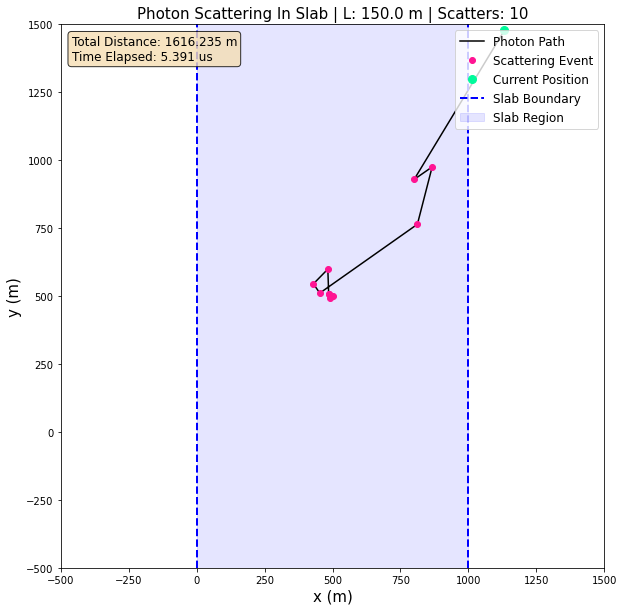

In [9]:
##Configure animation##

#Animation set-up
fig, ax = plt.subplots(figsize=(12, 10))
line, = ax.plot([], [], color = 'black', linewidth=1.5, label='Photon Path')
scat_point, = ax.plot([], [], 'o', color = 'deeppink', markersize=6, label='Scattering Event')
current_point, = ax.plot([], [], 'o', color = 'mediumspringgreen', markersize=8, label='Current Position')

#Plot configuration
ax.set_xlim(-slab_width.value/2, slab_width.value * 1.5)
ax.set_ylim(-slab_width.value/2, slab_width.value * 1.5)

ax.set_aspect('equal', adjustable='box')

ax.set_title(f'Photon Scattering In Slab | L: {mfp.value} m', fontsize = 15)
ax.set_xlabel('x (m)', fontsize = 15)
ax.set_ylabel('y (m)', fontsize = 15)

ax.axvline(0, color='blue', linestyle='--', linewidth=2, label='Slab Boundary')
ax.axvline(slab_width.value, color='blue', linestyle='--', linewidth=2)
ax.axvspan(0, slab_width.value, color='blue', alpha=0.1, label='Slab Region')

# Add text box for stats
stats_text = ax.text(0.02, 0.98, '', transform=ax.transAxes, 
                     fontsize=12, verticalalignment='bottom',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.legend(loc = 'lower right', fontsize = 12)

# Create the animation
anim = FuncAnimation(
    fig,
    update_animation,
    frames = range(max_scatters),
    init_func = init,
    blit = True,
    interval = time_delay,
    repeat = False
)

# Save and display as HTML
HTML(anim.to_jshtml())